In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from numpy import array
plt.rcParams['figure.figsize'] = [20, 8]

In [37]:
df = pd.read_csv('../Dataset/Gold.csv')
df = df.sort_index(ascending=False)
df

,Date,Open,Close,High,Low
1693,3/1/2019,1314.460,1292.765,1315.105,1290.355
1692,3/2/2019,1292.765,1292.765,1292.765,1292.765
1691,3/3/2019,1292.765,1292.765,1292.765,1292.765
1690,3/4/2019,1295.910,1286.710,1297.105,1283.160
1689,3/5/2019,1287.410,1287.775,1289.550,1281.460
...,...,...,...,...,...
4,3/22/2024,2181.340,2165.400,2186.050,2157.450
3,3/23/2024,2165.400,2165.400,2165.400,2165.400
2,3/24/2024,0.000,2165.990,2167.890,2165.300
1,3/25/2024,2166.820,2172.300,2181.000,2163.970


In [38]:
df['Close'].isnull().sum()

0

In [39]:
df = df.reset_index()['Close']

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [41]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [42]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [43]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [44]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 [==============================] - 6s 159ms/step - loss: 0.0704 - val_loss: 0.0084
Epoch 2/100
17/17 [==============================] - 2s 95ms/step - loss: 0.0087 - val_loss: 0.0208
Epoch 3/100
17/17 [==============================] - 1s 86ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 4/100
17/17 [==============================] - 2s 95ms/step - loss: 0.0028 - val_loss: 0.0061
Epoch 5/100
17/17 [==============================] - 2s 97ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 6/100
17/17 [==============================] - 2s 104ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 7/100
17/17 [==============================] - 2s 98ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 8/100
17/17 [==============================] - 2s 103ms/step - loss: 9.4555e-04 - val_loss: 0.0012
Epoch 9/100
17/17 [==============================] - 2s 102ms/step - loss: 7.5070e-04 - val_loss: 8.1988e-04
Epoch 10/100
17/17 [==============================] - 2s 94ms/step - loss: 6.4093e-0

In [47]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

13/13 [==============================] - 1s 30ms/step


In [48]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [49]:
train_size1 = int(0.6 * len(df))
test_size1 = len(df) - train_size

train_data1 = df[:train_size]
test_data1 = df[train_size:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

In [50]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Testing RMSE:', test_rmse)

#MSE
test_mse = np.mean((y_pred - y_test1)**2)
print('Testing MSE:', test_mse)

#MAPE
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Testing MAE:', test_mae)

Testing RMSE: 128.40178192102223
Testing MSE: 16487.01760049375
Testing MAPE: 5.217622886498155
Testing MAE: 99.40479416934554


In [51]:
lst_output=[]
n_steps=100
i=0

x_input = test_data[len(test_data) - n_steps:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.96648365]
101
1 day input [0.81208738 0.82621437 0.81722935 0.83225806 0.84015887 0.84015887
 0.84015887 0.84015887 0.84307874 0.86634104 0.85328753 0.85293328
 0.85030326 0.85030326 0.84637432 0.82754549 0.82962804 0.83216145
 0.83216145 0.83216145 0.81395524 0.81544737 0.81071333 0.81435242
 0.83557512 0.83557512 0.83557512 0.84175836 0.81355805 0.78981268
 0.80777199 0.81480328 0.81480328 0.81480328 0.80626912 0.81433095
 0.79822876 0.8053674  0.80302721 0.80302721 0.80253341 0.81746551
 0.82266116 0.82491546 0.84176909 0.82459342 0.82459342 0.82459342
 0.80965058 0.82175943 0.82065375 0.81982717 0.80921046 0.80921046
 0.80921046 0.80451935 0.77567495 0.77416134 0.78726853 0.79735924
 0.79735924 0.79735924 0.80111642 0.80883474 0.8107348  0.80933927
 0.82158768 0.82158768 0.82158768 0.81653159 0.81572648 0.82004187
 0.83060491 0.87273898 0.87273898 0.87273898 0.90585583 0.92034781
 0.94217165 0.9547421  0.97386077 0.97386077 0.97424722 0.9775106
 0.9537867  0.97085503 0.95645966 

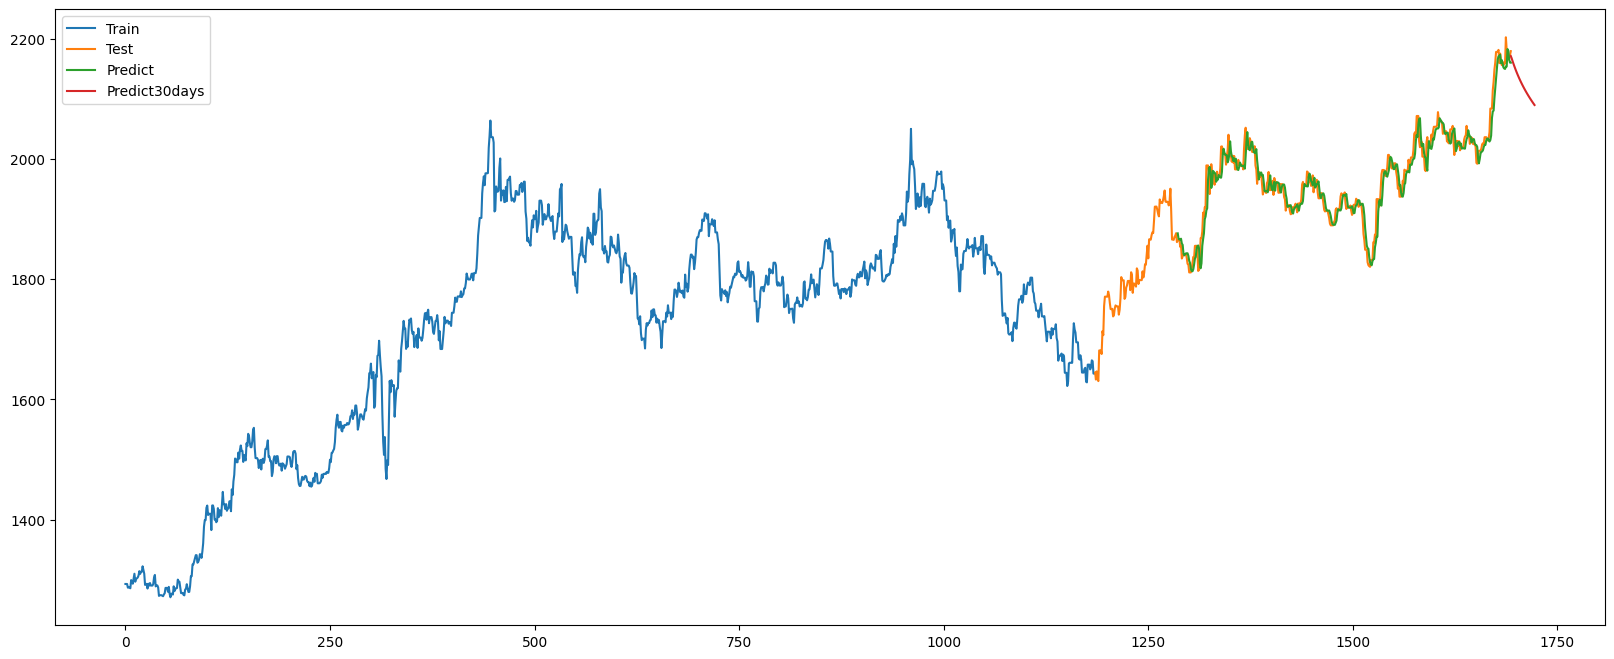

<Figure size 2000x800 with 0 Axes>

In [53]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.figure()
plt.show()